<a href="https://colab.research.google.com/github/saksham1965/Project/blob/main/LAB_EVALUATION_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


In [65]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [69]:
df.fillna({'name': 'N/A'}, inplace=True)

In [70]:
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [71]:
# Encode categorical variables
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

# Check the unique categories
df['room_type'].cat.categories, df['neighbourhood_group'].cat.categories


(Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object'),
 Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object'))

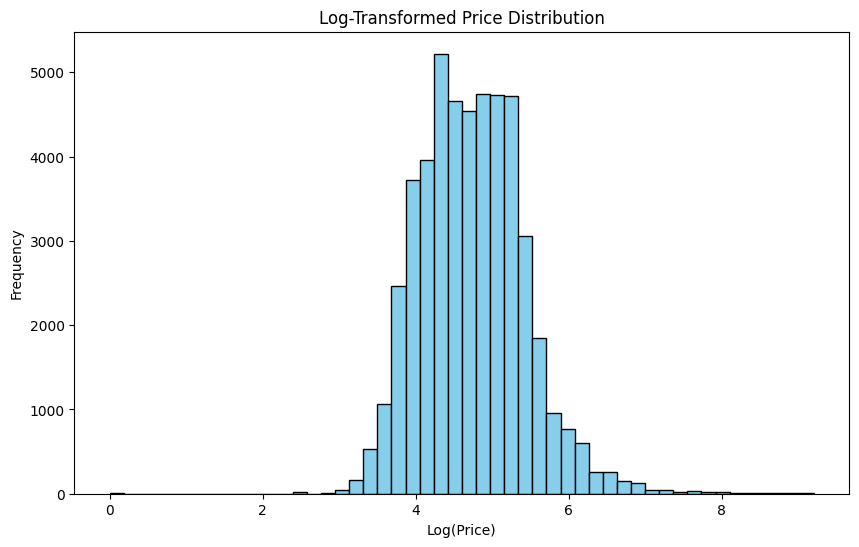

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Log-transform the 'price' column
df['log_price'] = np.log1p(df['price'])

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['log_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()


In [74]:
# Drop irrelevant columns
df.drop(columns=[ 'name', 'host_id', 'latitude', 'longitude'], inplace=True)


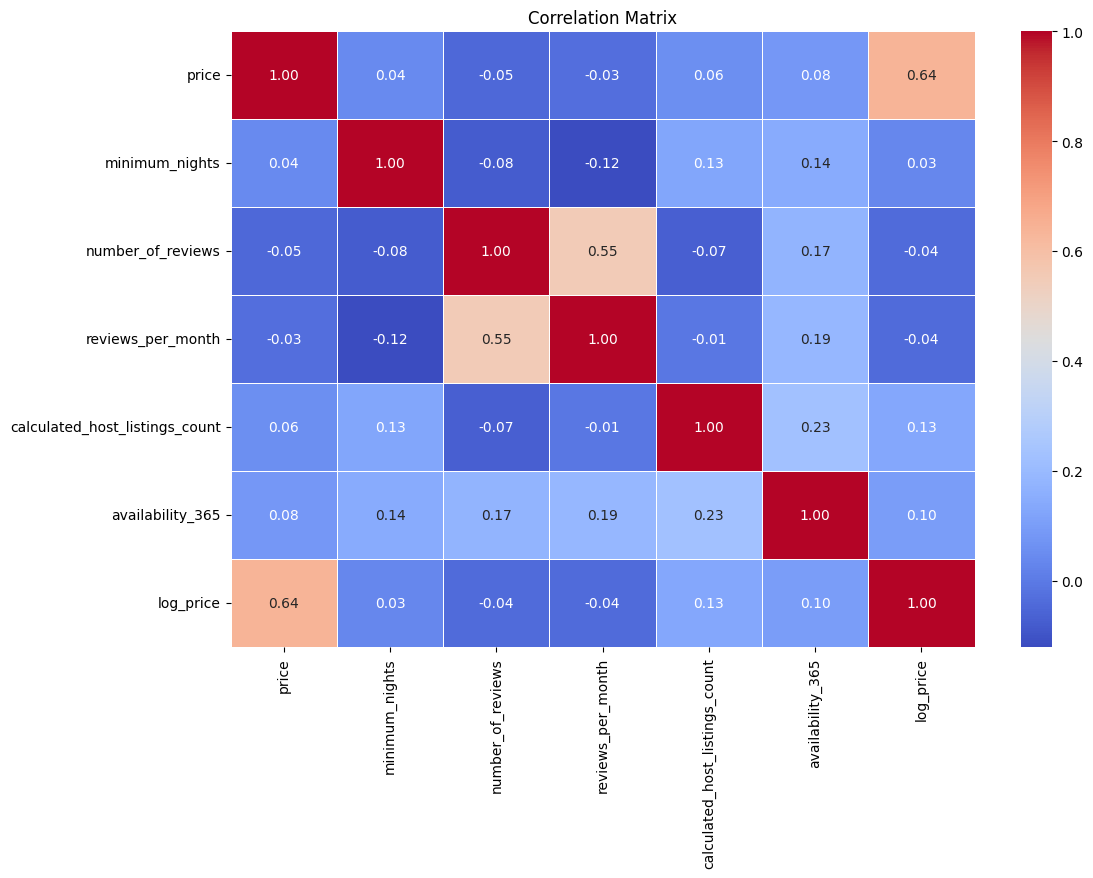

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix, considering only numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-80-e2e459c98b90>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='Set2')


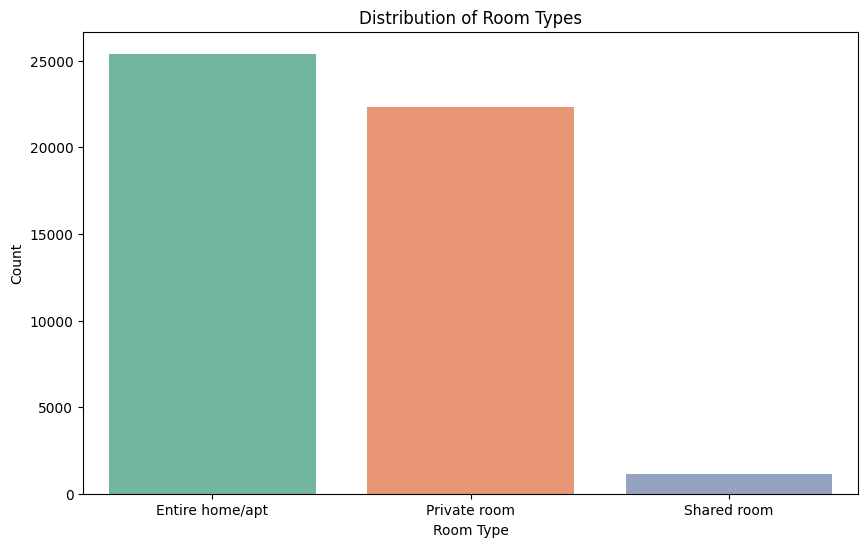

<ipython-input-80-e2e459c98b90>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood_group', data=df, palette='Set3')


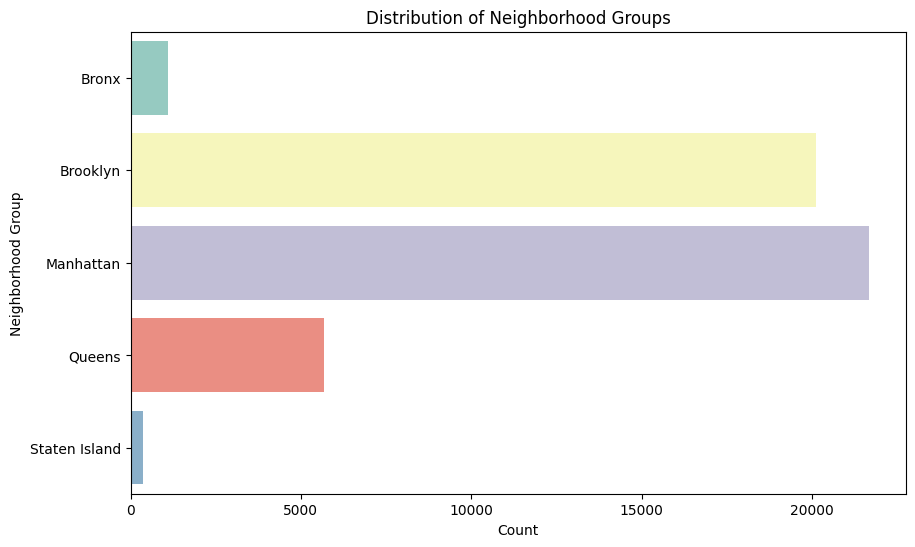

In [80]:
#### PART B
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='Set2')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()
## for Neighbourhood group
plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood_group', data=df, palette='Set3')
plt.title('Distribution of Neighborhood Groups')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()



<ipython-input-81-ffa3c1ca765d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='muted')


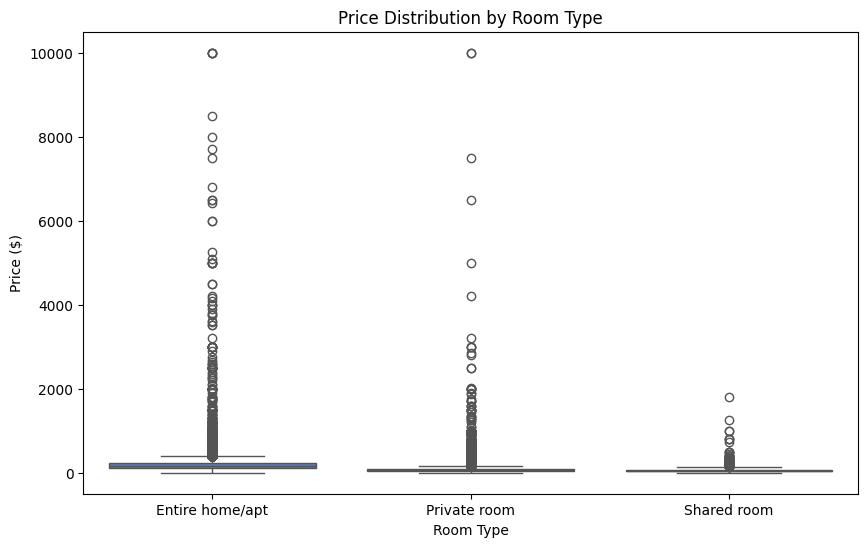

<ipython-input-81-ffa3c1ca765d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='coolwarm')


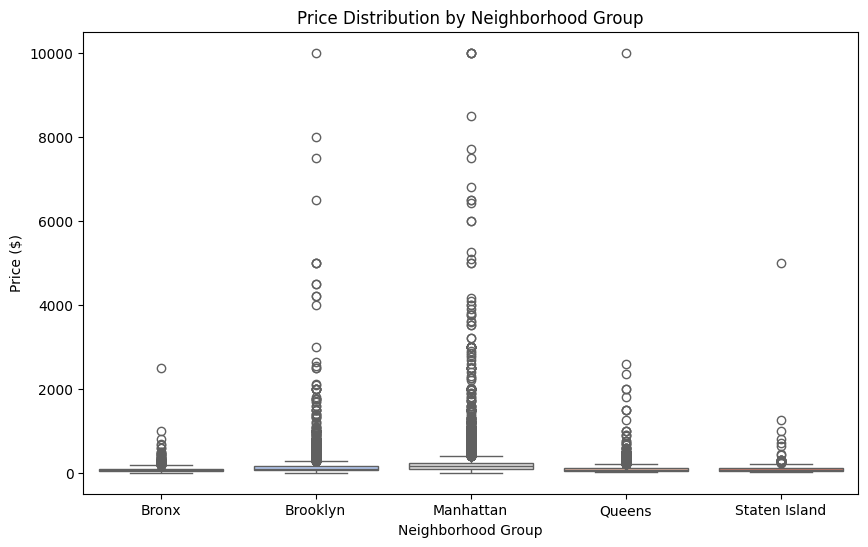

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='muted')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

#### Neighbourhood
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price ($)')
plt.show()


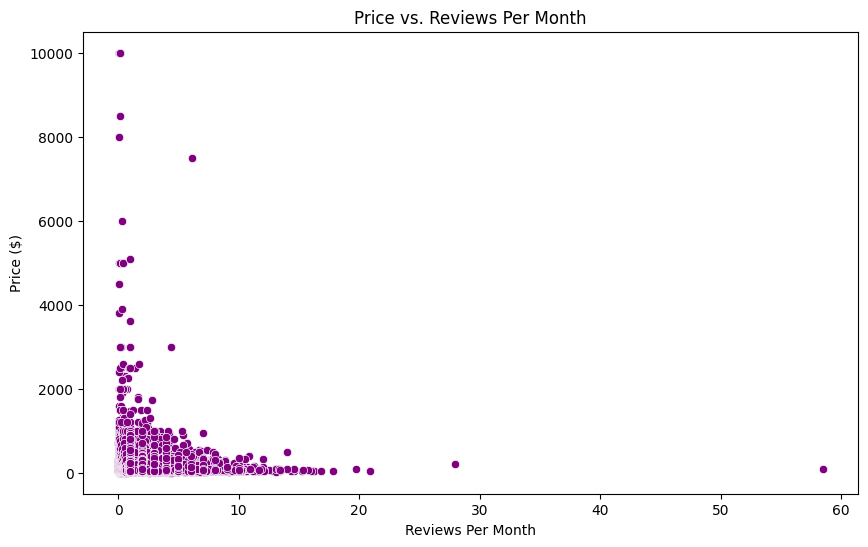

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=df, color='purple')
plt.title('Price vs. Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Price ($)')
plt.show()


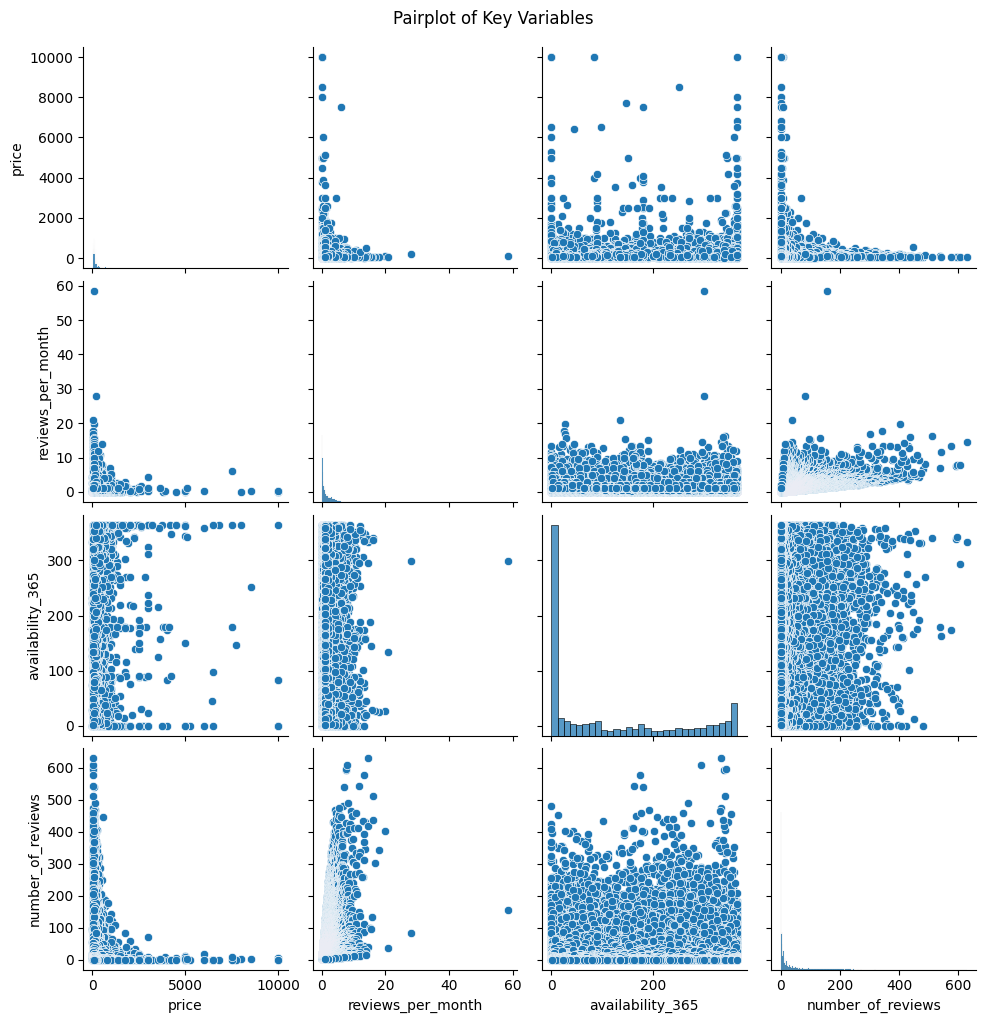

In [83]:
sns.pairplot(df[['price', 'reviews_per_month', 'availability_365', 'number_of_reviews']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


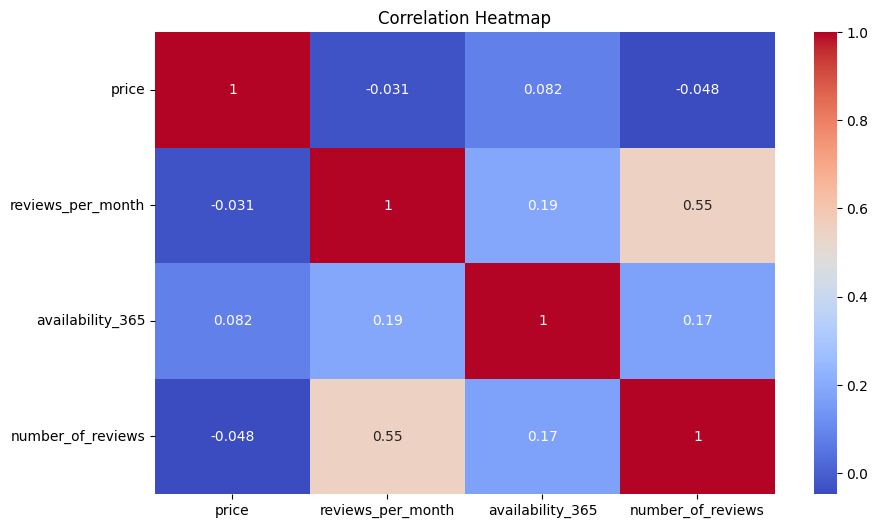

In [84]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['price', 'reviews_per_month', 'availability_365', 'number_of_reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
